<a href="https://colab.research.google.com/github/EmiliaFidler/Intro_to_Comp_Ling_WS24/blob/main/homeexercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Exericse 2: Word Embeddings
In this second home exercise, you will use the knowledge from Tutorial 3 to perform a more systematic evaluation of embeddings based on a small analogy dataset.

In this notebook, please complete all instructions starting with 👋 ⚒ in the code cell after the sign or provide your analysis in the text cell after the sign.

## **Word2Vec Analogy-based Evaluation**

We first need to load the pretrained embeddings and the dataset. The dataset can be found on [GitHub](https://github.com/dgromann/cl_intro_ws2024/blob/main/exercises/HomeExercise2.txt) and will be loaded directly from there.

In [ ]:
!wget https://github.com/dgromann/cl_intro_ws2024/raw/main/word2vec_embeddings.bin
!wget !wget https://raw.githubusercontent.com/dgromann/cl_intro_ws2024/master/exercises/HomeExercise2.txt

--2024-11-26 09:03:54--  https://github.com/dgromann/cl_intro_ws2024/raw/main/word2vec_embeddings.bin
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dgromann/cl_intro_ws2024/main/word2vec_embeddings.bin [following]
--2024-11-26 09:03:55--  https://raw.githubusercontent.com/dgromann/cl_intro_ws2024/main/word2vec_embeddings.bin
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96769269 (92M) [application/octet-stream]
Saving to: ‘word2vec_embeddings.bin’

word2vec_embeddings 100%[===================>]  92.29M   180MB/s    in 0.5s    

2024-11-26 09:03:57 (180 MB/s) - ‘word2vec_embeddings.bin’ saved

Then we need to load the model with gensim so that we can access the embeddings.

In [ ]:
import gensim

model_w2v = gensim.models.KeyedVectors.load_word2vec_format("word2vec_embeddings.bin", binary=True)

And we need to open the HomeExercise2.txt file that contains analogy pairs.

In [ ]:
analogy = open("HomeExercise2.txt", "r")
analogy_lines = analogy.readlines()

To look at the first few lines, the following code can be used. The analogies are grouped by categories that is indicated on the line before the anlogies are listed with a colon :. The last and fourth element of the line represents the true result we will use to evaluate the embedding model.

In [ ]:
line_no = 0
for line in analogy_lines:
  line_no += 1
  print(f"Line number {line_no} with analogy {line}")
  if line_no == 5:
    break

Line number 1 with analogy : capital-common-countries

Line number 2 with analogy Athens Greece Baghdad Iraq

Line number 3 with analogy Athens Greece Berlin Germany

Line number 4 with analogy Athens Greece Cairo Egypt

Line number 5 with analogy Athens Greece Canberra Australia



👋 ⚒ Systematically evaluate this simple word embedding model based on the entire analogy dataset. To do this:


*   Use the analogy function from Tutorial 3 to obtain 'd'
*   Compare 'd' with the true result from the `HomeExercise1.txt` file
*   Calculate the accuracy for all analogies (how many times out of all attempts did the embedding model provide the correct result)
*   Calculate the accuracy for each analogy category separately

When parsing the file, pay attention to the lines indicated with the colon : that represent the analogy categories and not analogies.


In [ ]:
# Your code here
# Example: Athens is to Greece as Baghdad is to ?
# True result from file: Iraq
# Model result also Iraq?

import numpy as np

def analogy(a, b, c, model):
  a, b, c = [word.lower()  for word in [a, b, c]]
  try:
    result = model.most_similar(positive=[b, c], negative=[a], topn=5)
    return result
  except KeyError as e:
    print(f"Word not in vocabulary: {e}")
    return None


def calculate_accuracies(analogy_file, model):
  total_analogies = 0
  correct_predictions = 0
  category_accuracies = {}
  category_counts = {}
  current_category = None

  with open("HomeExercise2.txt", "r") as file:
    analogy_lines = file.readlines()

  # Process each analogy line
  for line in analogy_lines:
      line = line.strip()
      if line.startswith(":"):
        # identifying category line
          current_category = line[1:].strip()
          # Counters for new category
          if current_category not in category_accuracies:
              category_accuracies[current_category] = 0
              category_counts[current_category] = 0
      else:
          # Split analogy into a, b, c, true_d
          words = line.split()
          words = [word.lower() for word in words]
          if len(words) == 4:
              a, b, c, true_d = words
              # Get model's predicted word d
              prediction = analogy(a, b, c, model)
              if prediction is not None:
                  # Take only the top prediction
                  predicted_d = prediction[0][0] if len(prediction) > 0 else None
                  if predicted_d == true_d:
                      correct_predictions += 1
                      category_accuracies[current_category] += 1
                  category_counts[current_category] += 1
              total_analogies += 1

  # Calculating accuracy
  overall_accuracy = correct_predictions / total_analogies if total_analogies > 0 else 0

  # Calculating category-wise accuracy
  for category in category_accuracies:
    if category_counts[category] > 0:
      category_accuracies[category] /= category_counts[category]

  return overall_accuracy, category_accuracies, total_analogies, correct_predictions

In [ ]:
print(analogy("Athens", "Greece", "Baghdad", model_w2v))

[('Iraqi', 0.635187029838562), ('Mosul', 0.6185438632965088), ('Iraq', 0.6041382551193237), ('Sunni_Arab', 0.5862730741500854), ('Iraqis', 0.5799271464347839)]


In [ ]:
overall_acc, category_accs, total_analogies, correct_predictions = calculate_accuracies(
    "HomeExercise2.txt", model_w2v
)

print(f"Total Analogies: {total_analogies}")
print(f"Correct Predictions: {correct_predictions}")
print(f"Overall Accuracy: {overall_acc:.2%}")
print("Category-wise Accuracies:")
for category, acc in category_accs.items():
    print(f"Category: {category}, Accuracy: {acc:.2%}")

Total Analogies: 8995
Correct Predictions: 6787
Overall Accuracy: 75.45%
Category-wise Accuracies:
Category: capital-common-countries, Accuracy: 87.14%
Category: capital-world, Accuracy: 89.56%
Category: currency, Accuracy: 0.00%
Category: city-in-state, Accuracy: 78.72%
Category: family, Accuracy: 92.86%
Category: gram1-adjective-to-adverb, Accuracy: 30.30%
Category: gram2-opposite, Accuracy: 53.56%
Category: gram3-comparative, Accuracy: 91.22%
Category: gram4-superlative, Accuracy: 87.87%
Category: gram5-present-participle, Accuracy: 77.52%
Category: gram6-nationality-adjective, Accuracy: 95.90%
Category: gram7-past-tense, Accuracy: 69.14%
Category: gram8-plural, Accuracy: 87.32%
Category: gram9-plural-verbs, Accuracy: 68.00%


## **Comparison: GloVe Analogy-based Evaluation**

The next step will consist of comparing this very small word2vec embedding model with a different small but more powerfull model available in gensim.

All models and corpora available in gensim can be found [here](https://github.com/piskvorky/gensim-data).

Since this model is considerably bigger than the tiny word2vec model, it takes some time to load when you run the following code cell.

In [ ]:
import gensim.downloader as api
from gensim.models import KeyedVectors

model_glove = api.load("glove-wiki-gigaword-100")
print(type(model_glove))

<class 'gensim.models.keyedvectors.KeyedVectors'>


The model can then be used exactly the same as the word2vec model, since gensim standardizes model access.

In [ ]:
model_glove["bread"]

array([-0.66146  ,  0.94335  , -0.72214  ,  0.17403  , -0.42524  ,
        0.36303  ,  1.0135   , -0.14802  ,  0.25817  , -0.20326  ,
       -0.64338  ,  0.16632  ,  0.61518  ,  1.397    , -0.094506 ,
        0.0041843, -0.18976  , -0.55421  , -0.39371  , -0.22501  ,
       -0.34643  ,  0.32076  ,  0.34395  , -0.7034   ,  0.23932  ,
        0.69951  , -0.16461  , -0.31819  , -0.34034  , -0.44906  ,
       -0.069667 ,  0.35348  ,  0.17498  , -0.95057  , -0.2209   ,
        1.0647   ,  0.23231  ,  0.32569  ,  0.47662  , -1.1206   ,
        0.28168  , -0.75172  , -0.54654  , -0.66337  ,  0.34804  ,
       -0.69058  , -0.77092  , -0.40167  , -0.069351 , -0.049238 ,
       -0.39351  ,  0.16735  , -0.14512  ,  1.0083   , -1.0608   ,
       -0.87314  , -0.29339  ,  0.68278  ,  0.61634  , -0.088844 ,
        0.88094  ,  0.099809 , -0.27161  , -0.58026  ,  0.50364  ,
       -0.93814  ,  0.67576  , -0.43124  , -0.10517  , -1.2404   ,
       -0.74353  ,  0.28637  ,  0.29012  ,  0.89377  ,  0.6740

👋 ⚒  Run the same systematic analysis for this gensim model as for the word2vec model above. Which model performs better overall and in specific categories?

In [ ]:
print(analogy("Athens", "Greece", "Baghdad", model_glove))

[('iraq', 0.7903196811676025), ('afghanistan', 0.708052933216095), ('lebanon', 0.6782742142677307), ('arabia', 0.6659936904907227), ('syria', 0.6550308465957642)]


In [ ]:
# Your code here
overall_acc, category_accs, total_analogies, correct_predictions = calculate_accuracies(
    "HomeExercise2.txt", model_glove
  )

print(f"Total Analogies: {total_analogies}")
print(f"Correct Predictions: {correct_predictions}")
print(f"GloVe Overall Accuracy: {overall_acc:.2%}")
print("GloVe Category-wise Accuracies:")
for category, acc in category_accs.items():
    print(f"Category: {category}, Accuracy: {acc:.2%}")

[('iraq', 0.7903196811676025), ('afghanistan', 0.708052933216095), ('lebanon', 0.6782742142677307), ('arabia', 0.6659936904907227), ('syria', 0.6550308465957642)]
Total Analogies: 8995
Correct Predictions: 5554
GloVe Overall Accuracy: 61.75%
GloVe Category-wise Accuracies:
Category: capital-common-countries, Accuracy: 90.95%
Category: capital-world, Accuracy: 93.67%
Category: currency, Accuracy: 0.00%
Category: city-in-state, Accuracy: 31.14%
Category: family, Accuracy: 89.56%
Category: gram1-adjective-to-adverb, Accuracy: 25.00%
Category: gram2-opposite, Accuracy: 25.30%
Category: gram3-comparative, Accuracy: 79.13%
Category: gram4-superlative, Accuracy: 61.76%
Category: gram5-present-participle, Accuracy: 69.56%
Category: gram6-nationality-adjective, Accuracy: 98.26%
Category: gram7-past-tense, Accuracy: 58.26%
Category: gram8-plural, Accuracy: 83.48%
Category: gram9-plural-verbs, Accuracy: 55.83%


**Comparison of the two models:**
Word2Vec performs significantly better overall, with a higher overall accuracy of 75.45% compared to 61.75% for GloVe.

Word2Vec excels in the categories city-in-state (78.72% vs. 31.14% for GloVe), gram3-comparative ( 91.22% vs GloVe's 79.13%) and gram4-superlative (87.87% vs GloVe's 61.76%).

GloVe is better than Word2Vec in the categories capital-common-countries (slightly, 90.95% vs Word2Vec's 87.14%), capital-world (with 93.67% vs. 89.56%) and gram6-nationality-adjective (only slightly better, 98.26% vs Word2Vec's 95.90%).

Word2Vec generally performs better in linguistic relationships (e.g., gram3-comparative, gram4-superlative) and practical knowledge (e.g., city-in-state). GloVe is slightly better in geographical categories (capital-common-countries, capital-world) and excels in gram6-nationality-adjective.

## **Visual Comparison**

As a final step, use the visualization from Tutorial 3 to visually output the two models based on the following words.

👋 ⚒  ❓ Do the clusters (groupings of embeddings) in the GloVe visualization differ substantially from the clusters in the word2vec visualization from Tutorial 3?

In [ ]:
import numpy as np

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

def display_pca_scatterplot(model, words):
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)


# unique words from the analogy_file without the category lines
def words_to_display(analogy_file, lower=False):

  with open("HomeExercise2.txt", "r") as file:
    analogy_lines = file.readlines()

  # Process each analogy line
  words = set()
  for line in analogy_lines:
      line = line.strip()
      if line.startswith(":"):
        continue
      else:
        word_list = line.split()
        for word in word_list:
          if word in model.key_to_index:
            words.add(word.lower() if lower else word)
  return list(words)

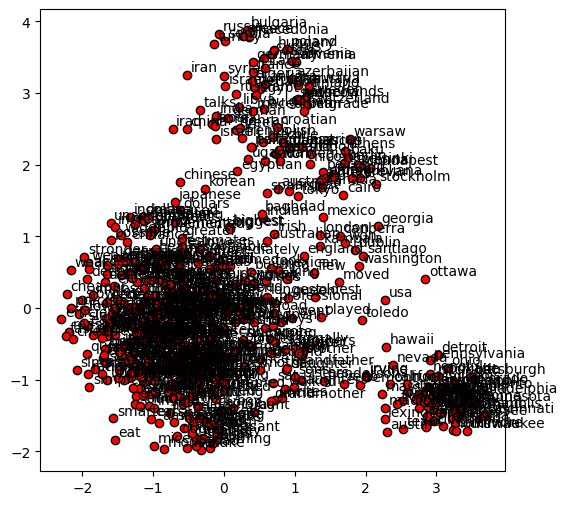

In [ ]:
words = words_to_display('HomeExercise2.txt', lower=True)
display_pca_scatterplot(model_glove, words)

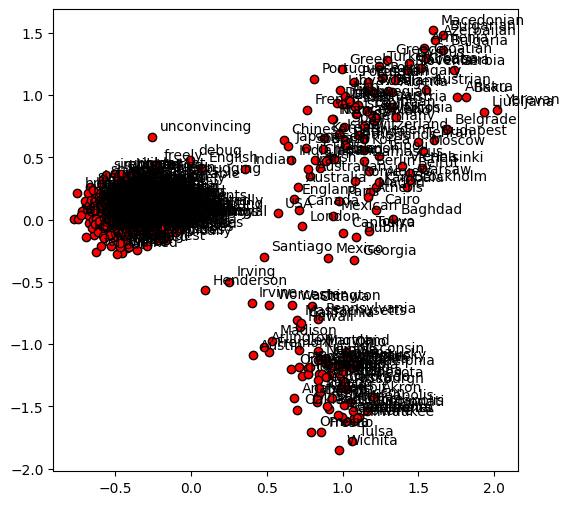

In [ ]:
words = words_to_display('HomeExercise2.txt')
display_pca_scatterplot(model_w2v, words)

**Provide your answer to the question on the clusters here.**

**GloVe** embeddings form more dense clusters in several distinct regions (really tight and dense). Words like countries, cities, and nationalities tend to group together closely. The clusters overlap a lot, so it’s harder to see clear separations between groups (especially with any geographical categories).

similar words grouped tighly --> great for spotting words that are close in meaning


**Word2Vec’s** clusters are spread out more, and it’s easier to see where one group ends and another begins.For example, you can spot cities, countries, and nationalities in their own areas without much overlap. However, some words (like "unconvincing") pop up in random spots, so Word2Vec isn’t as good at handling outliers.

more spread out --> better at seperating different types of words

## **Bias in Embeddings**

Language models and also embedding models tend to reflect on bias that is present in the textual data they were trained on. This can also be analyzed with embeddings by explicitly testing biased analogies.

For instance, man is to doctor as woman is to ?

The bias here is that professions tend to be assigned a specific gender, e.g. men are doctors and women are nurses.

The same is true for cultures and cultural bias, e.g. Bratwurst or Sauerkraut and Germany.



In [ ]:
result1 = model_glove.most_similar(positive=["doctor", "woman"], negative=["man"], topn=3)
print(f"man is to doctor as woman is to {result1}")
result2 = model_glove.most_similar(positive=["bratwurst", "france"], negative=["germany"], topn=3)
print(f"Germany is to Bratwurst as France is to {result2}")

man is to doctor as woman is to [('nurse', 0.7735227942466736), ('physician', 0.7189430594444275), ('doctors', 0.6824328303337097)]
Germany is to Bratwurst as France is to [('bouillabaisse', 0.5761943459510803), ('foie', 0.5738863945007324), ('consomme', 0.5617873668670654)]


👋 ⚒ Try to come up with two biased analogies yourself and test if the GloVe and word2vec models suffers from this type of bias. Please try to be creative and do not just change woman to girl and man to boy or something similar.

In [ ]:
# Test your biased analogies on both models here

result3 = model_glove.most_similar(positive=["success", "poor"], negative=["rich"], topn=3)
print(f"rich is to success as poor is to {result3}")
result4 = model_glove.most_similar(positive=["morning", "wine"], negative=["cereal"], topn=3)
print(f"cereal is to morning as wine is to {result4}")
result5 = model_glove.most_similar(positive=["warm", "ice"], negative=["fire"], topn=3)
print(f"fire is to warm as ice is to {result5}")
result6 = model_glove.most_similar(positive=["unhealthy", "salad"], negative=["burger"], topn=3)
print(f"burger is to unhealthy as salad is to {result6}")
result7 = model_glove.most_similar(positive=["car", "woman"], negative=["man"], topn=3)
print(f"man is to car as woman is to {result7}")

rich is to success as poor is to [('lack', 0.6558415293693542), ('failure', 0.6558327078819275), ('performance', 0.6384012699127197)]
cereal is to morning as wine is to [('afternoon', 0.7038321495056152), ('evening', 0.6793146729469299), ('day', 0.6566906571388245)]
fire is to warm as ice is to [('cream', 0.6365432143211365), ('warmer', 0.6224691271781921), ('chocolate', 0.5985925793647766)]
burger is to unhealthy as salad is to [('healthful', 0.5499582290649414), ('scanty', 0.5202867388725281), ('acidic', 0.5128246545791626)]
man is to car as woman is to [('truck', 0.7416200637817383), ('vehicle', 0.7411581873893738), ('driver', 0.7010902762413025)]
